In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from scattermap import scattermap

In [2]:
df_1 = pd.read_csv('./out/pvalues.txt', sep='\t', index_col='interacting_pair')
df_1.head()

,id_cp_interaction,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,...,Tip-like EC|Tumor EC,Tumor EC|CA,Tumor EC|CAF,Tumor EC|Col1A1 matrix FB,Tumor EC|Lymphatics,Tumor EC|Matrix FB,Tumor EC|Myo FB,Tumor EC|Stalk-like EC,Tumor EC|Tip-like EC,Tumor EC|Tumor EC
interacting_pair,,,,,,,,,,,,,,,,,,,,,
KLRG2_WNT11,CPI-SS0A7B487D4,simple:A4D1S0,simple:O96014,ENSG00000188883,ENSG00000085741,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_TNFSF9,CPI-SS0FEC87269,simple:A4D1S0,simple:P41273,ENSG00000188883,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PVR_TNFSF9,CPI-SS00A8596B5,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_WNT5B,CPI-SS044DF8749,simple:A4D1S0,simple:Q9H1J7,ENSG00000188883,ENSG00000111186,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GALR2_GAL,CPI-SS0F8ABC300,simple:O43603,simple:P22466,ENSG00000182687,ENSG00000069482,True,True,False,guidetopharmacology.org,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
df_1.columns.tolist()

['id_cp_interaction',
 'partner_a',
 'partner_b',
 'gene_a',
 'gene_b',
 'secreted',
 'receptor_a',
 'receptor_b',
 'annotation_strategy',
 'is_integrin',
 'CA|CA',
 'CA|CAF',
 'CA|Col1A1 matrix FB',
 'CA|Lymphatics',
 'CA|Matrix FB',
 'CA|Myo FB',
 'CA|Stalk-like EC',
 'CA|Tip-like EC',
 'CA|Tumor EC',
 'CAF|CA',
 'CAF|CAF',
 'CAF|Col1A1 matrix FB',
 'CAF|Lymphatics',
 'CAF|Matrix FB',
 'CAF|Myo FB',
 'CAF|Stalk-like EC',
 'CAF|Tip-like EC',
 'CAF|Tumor EC',
 'Col1A1 matrix FB|CA',
 'Col1A1 matrix FB|CAF',
 'Col1A1 matrix FB|Col1A1 matrix FB',
 'Col1A1 matrix FB|Lymphatics',
 'Col1A1 matrix FB|Matrix FB',
 'Col1A1 matrix FB|Myo FB',
 'Col1A1 matrix FB|Stalk-like EC',
 'Col1A1 matrix FB|Tip-like EC',
 'Col1A1 matrix FB|Tumor EC',
 'Lymphatics|CA',
 'Lymphatics|CAF',
 'Lymphatics|Col1A1 matrix FB',
 'Lymphatics|Lymphatics',
 'Lymphatics|Matrix FB',
 'Lymphatics|Myo FB',
 'Lymphatics|Stalk-like EC',
 'Lymphatics|Tip-like EC',
 'Lymphatics|Tumor EC',
 'Matrix FB|CA',
 'Matrix FB|CAF',
 'M

In [6]:
df_2=df_1[[
 'secreted', 'is_integrin',
 'CA|CAF',
 'CA|Col1A1 matrix FB',
 'CA|Lymphatics',
 'CA|Matrix FB',
 'CA|Myo FB',
 'CA|Stalk-like EC',
 'CA|Tip-like EC',
 'CA|Tumor EC']]
df_2.shape

(1229, 10)

In [7]:
df_3 = df_2[((df_2['secreted']==True) & (df_2['is_integrin']==False))]
df_3.shape

(837, 10)

In [8]:
df_4 = df_3[(df_3['CA|CAF']<0.001)|
            (df_3['CA|Col1A1 matrix FB']<0.001)|
            (df_3['CA|Lymphatics']<0.001)|            
            (df_3['CA|Matrix FB']<0.001)|
            (df_3['CA|Myo FB']<0.001)|
            (df_3['CA|Stalk-like EC']<0.001)|
            (df_3['CA|Tip-like EC']<0.001)|
            (df_3['CA|Tumor EC']<0.001)]
df_4

,secreted,is_integrin,CA|CAF,CA|Col1A1 matrix FB,CA|Lymphatics,CA|Matrix FB,CA|Myo FB,CA|Stalk-like EC,CA|Tip-like EC,CA|Tumor EC
interacting_pair,,,,,,,,,,
TGFB1_TGFBR3,True,False,1.000,0.000,0.0,0.000,1.0,0.000,0.0,0.000
LAMP1_FAM3C,True,False,1.000,0.000,0.0,0.000,1.0,0.000,1.0,1.000
CXADR_FAM3C,True,False,1.000,0.000,0.0,0.000,1.0,0.000,1.0,1.000
EGFR_TGFB1,True,False,0.000,0.000,0.0,1.000,1.0,0.000,1.0,0.000
CD74_MIF,True,False,0.000,0.000,0.0,0.000,0.0,0.086,1.0,1.000
EGFR_GRN,True,False,0.012,0.228,0.0,0.000,1.0,0.000,0.0,0.000
TNFRSF1A_GRN,True,False,0.753,1.000,0.0,0.988,1.0,0.000,0.0,0.000
CD74_COPA,True,False,1.000,0.000,1.0,0.000,1.0,0.000,1.0,1.000
EGFR_HBEGF,True,False,1.000,1.000,1.0,1.000,1.0,0.000,1.0,0.033


In [9]:
df_4.columns.tolist()

['secreted',
 'is_integrin',
 'CA|CAF',
 'CA|Col1A1 matrix FB',
 'CA|Lymphatics',
 'CA|Matrix FB',
 'CA|Myo FB',
 'CA|Stalk-like EC',
 'CA|Tip-like EC',
 'CA|Tumor EC']

In [10]:
df_5 = df_4[[
 'CA|CAF',
 'CA|Col1A1 matrix FB',
 'CA|Lymphatics',
 'CA|Matrix FB',
 'CA|Myo FB',
 'CA|Stalk-like EC',
 'CA|Tip-like EC',
 'CA|Tumor EC']]
df_6 = df_5.sort_index(ascending=True)

In [ ]:
df_6.to_csv('./CA_ST.csv')

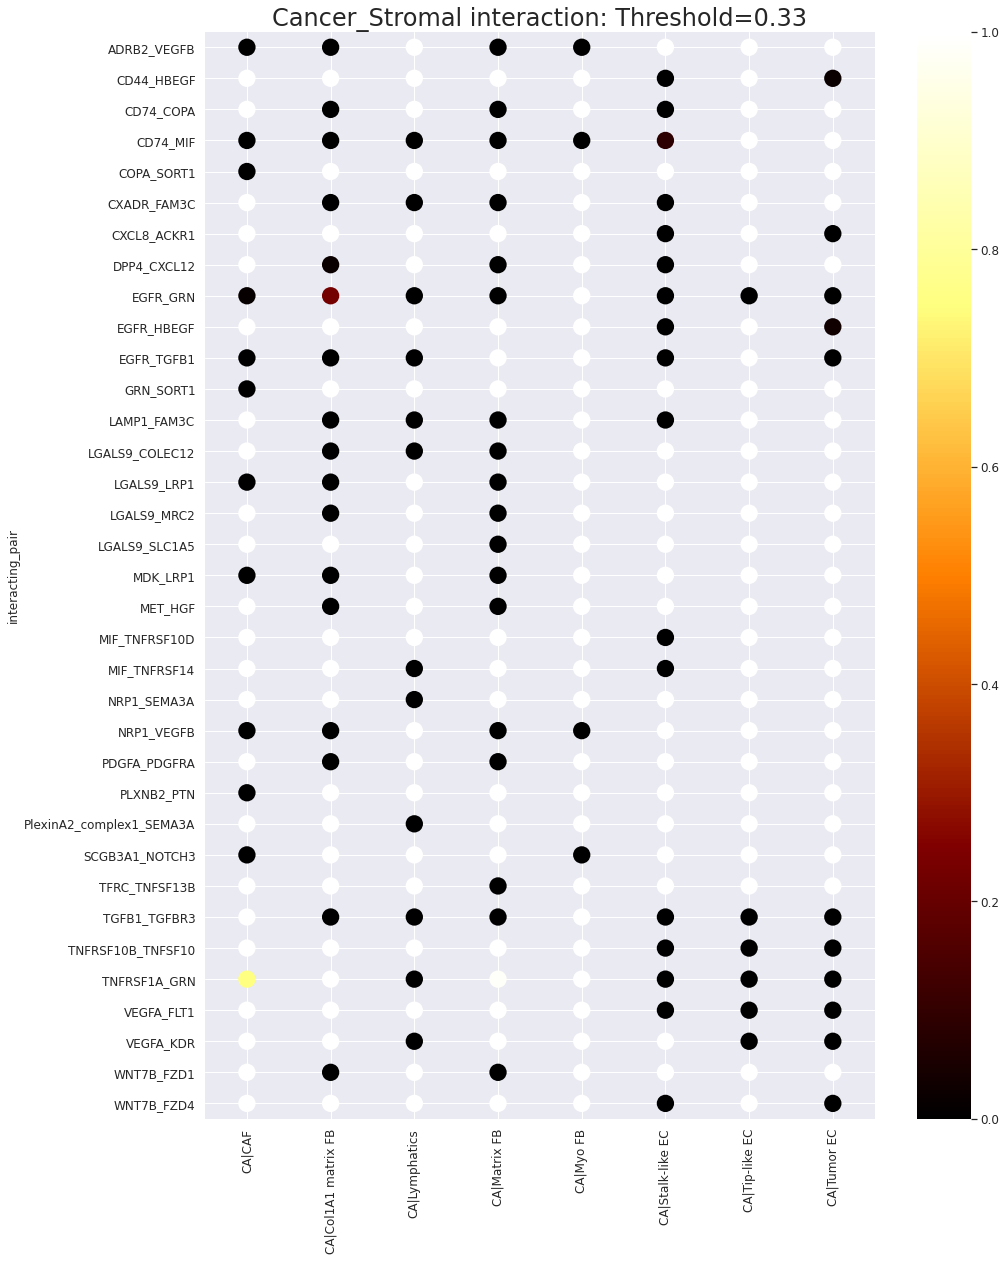

In [12]:
fig, ax = plt.subplots(figsize=(15, 20))

plt.title("Cancer_Stromal interaction: Threshold=0.33", size=24)
plt.rc('xtick', labelsize=12) # fontsize of the tick labels 
plt.rc('ytick', labelsize=12) # fontsize of the tick labels 
plt.rc('legend', fontsize=12)

ax=scattermap(df_6, marker_size=300, vmin=0, vmax=1, cmap='afmhot') #cmap=plt.cm.RdYlGn
plt.savefig("CA_ST.jpeg",dpi=1200)

In [ ]:
scattermap?